HU Extension            Assignment 01      E-89 Deep Learning
===    		                  	
Name: Yuntao Zhang
 
It is recommended that your solution for this assignment is implemented in Python.
If you insist, you can submit the solution in the language of your choice.


Problem 1.
===
Represent Matrix A as a numpy array:

${\bf A} = \begin{bmatrix} -2&1&0\\1&-2&1\\0&1&-2\\ \end{bmatrix}$

Find eigenvalues and eigenvectors of this matrix. Demonstrate using numpy operations that matrix product of matrix A and any one of its eigen vectors is collinear with that same eigen vector.

In [341]:
import numpy as np

In [342]:
# Set precision 4 for readability
PRECISION = 4
np.set_printoptions(precision=PRECISION, suppress=True)

In [343]:
# Define A
A = np.array([[-2, 1, 0], [1, -2, 1], [0, 1, -2]])
A

array([[-2,  1,  0],
       [ 1, -2,  1],
       [ 0,  1, -2]])

In [344]:
# take eigen values in an array eigen_v 
#  and eigen matrix eigen_m 
#  where its column vectors are A's eigen vectors
(eigen_v, eigen_m) = np.linalg.eig(A)

In [345]:
# Print vertical for readability
#  Each row: an eigen value of A
eigen_v.reshape(3, 1)

array([[-3.4142],
       [-2.    ],
       [-0.5858]])

In [346]:
# Eigen vectors are columnar vectors in this matrix
eigen_m

array([[ 0.5   ,  0.7071,  0.5   ],
       [-0.7071, -0.    ,  0.7071],
       [ 0.5   , -0.7071,  0.5   ]])

In [347]:
# Eigen vectors printed separately
for x in range(0,3):
    print("Eigen Vector {}".format(x))
    print(eigen_m[:,x].reshape(3, 1))

Eigen Vector 0
[[ 0.5   ]
 [-0.7071]
 [ 0.5   ]]
Eigen Vector 1
[[ 0.7071]
 [-0.    ]
 [-0.7071]]
Eigen Vector 2
[[0.5   ]
 [0.7071]
 [0.5   ]]


In [348]:
# Validate charactoristics of eigen vector and value
#    matrix product of matrix A and any one of its eigen vectors is collinear with that same eigen vector
for x in range(0, 3):
    # A * Eigen_Vector
    A_x_eigen_vector = np.dot(A, eigen_m[:, x])
    # Eigen_value * Eigen_Vector
    eigen_value_x_eigen_vector = eigen_v[x] * eigen_m[:, x]
    print("Testing for Eigen {}".format(x))
    print("A * eigen_vector = {}".format(A_x_eigen_vector))
    print("eigen_value * eigen_vector = {}".format(eigen_value_x_eigen_vector))
    # Expect them to be (almost: due to precision) equal
    #  Error when not equal
    np.testing.assert_almost_equal(
        A_x_eigen_vector, 
        eigen_value_x_eigen_vector,
        decimal=PRECISION,
        verbose=True
    )

Testing for Eigen 0
A * eigen_vector = [-1.7071  2.4142 -1.7071]
eigen_value * eigen_vector = [-1.7071  2.4142 -1.7071]
Testing for Eigen 1
A * eigen_vector = [-1.4142  0.      1.4142]
eigen_value * eigen_vector = [-1.4142  0.      1.4142]
Testing for Eigen 2
A * eigen_vector = [-0.2929 -0.4142 -0.2929]
eigen_value * eigen_vector = [-0.2929 -0.4142 -0.2929]


Problem 2. 
===
Create a numpy array whose columns are the eigen vectors of above matrix A. Call that E. Calculate, using numpy tools, the matrix products ${E^T AE}$ and ${EAE^T}$

What are the characteristic of the resulting matrix.

In [349]:
# Created numpy array is exactly eigen_m calculated above
E = eigen_m
E

array([[ 0.5   ,  0.7071,  0.5   ],
       [-0.7071, -0.    ,  0.7071],
       [ 0.5   , -0.7071,  0.5   ]])

In [350]:
# Transpose(E) * A * E
E.transpose().dot(A).dot(E)

array([[-3.4142, -0.    ,  0.    ],
       [-0.    , -2.    ,  0.    ],
       [ 0.    ,  0.    , -0.5858]])

In [351]:
# Eigen Values
eigen_v

array([-3.4142, -2.    , -0.5858])

${E^T AE}$ is a 3x3 matrix with A's eigen values on its diagonal 

In [352]:
# E * A * Transpose(E)
E.dot(A).dot(E.transpose())

array([[-0.5858, -0.    ,  0.    ],
       [-0.    , -2.    , -0.    ],
       [ 0.    , -0.    , -3.4142]])

In [353]:
# Eigen Values
eigen_v

array([-3.4142, -2.    , -0.5858])

${EAE^T}$ is a 3x3 matrix with A's eigen value in reverse order on its diagonal

Problem 3. 
===
Consider vector \[2, -1, 3\]T. Express that vector as a linear combination of the eigenvectors identified in problem 1.

In [354]:
# Define v
v = np.array([2, -1, 3]).transpose()
v

array([ 2, -1,  3])

In [355]:
# X = inv(E) * v
co = np.linalg.inv(eigen_m).dot(v)
co

array([ 3.2071, -0.7071,  1.7929])

In [356]:
# Prove linear combination of eigenvectors co forms v
#  i.e. v = co1 * e1 + co2 * e2 + co3 * e3
v_cal = np.array([0, 0, 0])
for x in range(0, 3):
    v_cal = v_cal + co[x] * eigen_m[:,x]
v_cal

array([ 2., -1.,  3.])

In [357]:
# Test equality, error when not equal
np.testing.assert_almost_equal(
        v, 
        v_cal,
        decimal=PRECISION,
        verbose=True
    )

Problem 4. 
===
Calculate, using numpy tools,  matrix B which is the inverse of matrix A from problem 1. Demonstrate that matrix products AB and BA are both very close to the identity  matrix.

In [358]:
# Let B be the inverse matrix of A
B = np.linalg.inv(A)
B

array([[-0.75, -0.5 , -0.25],
       [-0.5 , -1.  , -0.5 ],
       [-0.25, -0.5 , -0.75]])

In [359]:
# AB, within precision, equals to a 3x3 identity matrix I
A.dot(B)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [-0., -0.,  1.]])

In [360]:
# BA, within precision, equals to a 3x3 identity matrix I
B.dot(A)

array([[ 1.,  0., -0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

Problem 5. 
===
Generate a matrix C of dimensions 20 X 20 populated with random values following a normal distribution centered around zero and with a standard deviation of  . Export rows of matrix C into a one–dimensional array and plot the histogram of values contained in that array. Use 20 intervals for your histogram. Subsequently plot a Gaussian bell curve which approximately “fits” the histogram. If you know how, you could superimpose that curve over the histogram. You can as well present two separate plots. Also, if you know how, you can fit parameters of the Gaussian curve to achieve the least square fit of the curve and histogram. Otherwise, just adjust the parameters of the Gaussian curve by the eye. 

$$ G(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$ 

G(x) has two parameters: mean μ and standard deviation σ 

In [361]:
# Generate C 20x20, values follow normal dist (μ = 0, σ = 1)
C = np.random.randn(20, 20)

In [362]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize

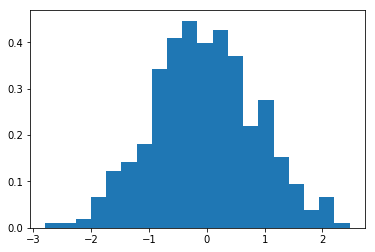

In [363]:
# cast the 20x20 matrix with value following statndard normal distribution into one-dimension
sample = C.reshape(400)

# histgram with density True, i.e. area sum to 1
#   this is meant to scale to the range of gaussian distribution for a better fitting
y, x_raw, _ = plt.hist(sample, 20, density=True)


In [364]:
# Prepare for fitting, calculate x value
# y is hight of each histogram bar, x is X value of center of each bar
x = [(x_raw[i] + x_raw[i+1])/2 for i in range(0, len(y))]

In [365]:
# Gaussian curve model 
# p = (mu, sigma)
model = lambda p, x : np.exp(-(x-p[0])**2/(2.*p[1]*p[1]))/(p[1]*np.sqrt(2.*np.pi))

In [366]:
# Least square fit error model
err = lambda p, x, y: (model(p, x) - y)**2

In [367]:
# start from a guess run optimization
guess = [1, 1]
fitted, success = sp.optimize.leastsq(err, guess, args=(x, y))   

In [368]:
# Fitted model: [mu, sigma]
fitted

array([-0.0662,  0.9377])

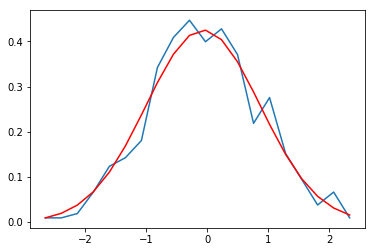

In [369]:
# Plot original value in blue and fitted model in red
plt.figure()
plt.plot(x, y)
plt.plot(x, model(fitted, x), 'r')